# Demo - Intereacting With MIDRC CT Scan Images

In this demo we will review how to import MIDRC imaging data, how to convert CT scan images from dicom (dcm) formats to png and jpeg formats, and how to view these CT scan images. This demo will also show how to extract file and patient metadata from the header of dicom (dcm) files.

### Import Data And Packages
Import the packages pydicom, pillow, and dicom_csv, as well as pandas, os and numpy. If any of these packages are not already installed to your workspace you can run one of the following:
- 'pip install < package >' in the workspace terminal
- '!pip install < package >' in a notebook cell

In [1]:
import pydicom
import numpy as np
from PIL import Image
import pandas as pd
import os
from dicom_csv import join_tree

Import data objects of CT scan images using the gen3 SDK

In [12]:
!gen3 drs-pull object dg.MD1R/ea669b5e-ae51-40ba-b375-ed23a9cd1855
!gen3 drs-pull object dg.MD1R/a745ed98-0cb9-4537-826b-13b2e354e8bb
!gen3 drs-pull object dg.MD1R/e604979a-c71b-4ec6-b8a0-959837b86384
!gen3 drs-pull object dg.MD1R/b5cee98d-46ff-4438-aa00-90727a383340
!gen3 drs-pull object dg.MD1R/8a5a5579-7925-432d-a614-3ed208f1c182
!gen3 drs-pull object dg.MD1R/33034812-47f3-4c0e-b60b-fa7a2a04ecda
!gen3 drs-pull object dg.MD1R/5ca987c5-c660-4785-a67d-a3424cc8ec6e
!gen3 drs-pull object dg.MD1R/44148117-1858-49ef-b30f-d239abfaff80
!gen3 drs-pull object dg.MD1R/9ea205e8-a774-4318-a323-95eadda9bc5c
!gen3 drs-pull object dg.MD1R/09ece36f-a0fa-48e8-8fc2-62110eaae570

All 5 data objects are now stored under the folder 'COVID-19-NY-SBU'

### View Image

In [3]:
image_path = 'COVID-19-NY-SBU/A034518/12-31-1900-CT ABD PELVIS(WITH CHEST IMAGES) W IV CON-21869/4.000000-Lung 1.0 CE-04129/1-273.dcm'
image_path

'COVID-19-NY-SBU/A034518/12-31-1900-CT ABD PELVIS(WITH CHEST IMAGES) W IV CON-21869/4.000000-Lung 1.0 CE-04129/1-273.dcm'

Read the dcm image using the relative file path.

In [4]:
ds = pydicom.dcmread(image_path)

Get the pixel arrays for the image.

In [5]:
new_image = ds.pixel_array.astype(float)
new_image

array([[-2048., -2048., -2048., ..., -2048., -2048., -2048.],
       [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
       [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
       ...,
       [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
       [-2048., -2048., -2048., ..., -2048., -2048., -2048.],
       [-2048., -2048., -2048., ..., -2048., -2048., -2048.]])

Scale the image's pixel array and convert to a uint8 integer.

In [6]:
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)
scaled_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Use the Image package to convert the image array and show the image.

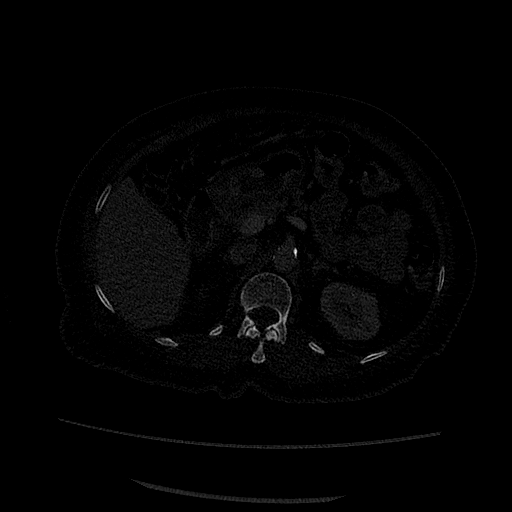

In [7]:
final_image = Image.fromarray(scaled_image)
final_image.show()

### Convert Images
Convert images form dcm format to jpeg and png formats and place converted image format to the original image folder.

In [8]:
def view_dicom_image(image_path):
    
    ds = pydicom.dcmread(image_path)
    
    new_image = ds.pixel_array.astype(float)
    
    scaled_image = np.uint8((np.maximum(new_image, 0) / new_image.max()) * 255.0)
    
    final_image = Image.fromarray(scaled_image)

    final_image.show()

def dcm_to_png(image_path):
    
    ds = pydicom.dcmread(image_path)
    
    new_image = ds.pixel_array.astype(float)
    
    scaled_image = np.uint8((np.maximum(new_image, 0) / new_image.max()) * 255.0)
    
    final_image = Image.fromarray(scaled_image)

    final_image.save(image_path.rsplit('/', 1)[1][:-3] + 'png')
    

def dcm_to_jpeg(image_path):
    
    ds = pydicom.dcmread(image_path)
    
    new_image = ds.pixel_array.astype(float)
    
    scaled_image = np.uint8((np.maximum(new_image, 0) / new_image.max()) * 255.0)
    
    final_image = Image.fromarray(scaled_image)

    final_image.save(image_path.rsplit('/', 1)[1][:-3] + 'jpg')    


Convert dicom image to png and save.

In [9]:
image_path = 'COVID-19-NY-SBU/A117394/10-08-1900-CT ABD AND PELVIS WITH IV CONT-39755/9.000000-CTA 0.5 CE-40834/1-0163.dcm'
dcm_to_png(image_path)

Convert dicom image to jpg and save.

In [10]:
image_path = 'COVID-19-NY-SBU/A587516/04-22-1901-CT CHEST WO IV CONT-40216/2.000000-Body 5.0-01241/1-16.dcm'
dcm_to_jpeg(image_path)

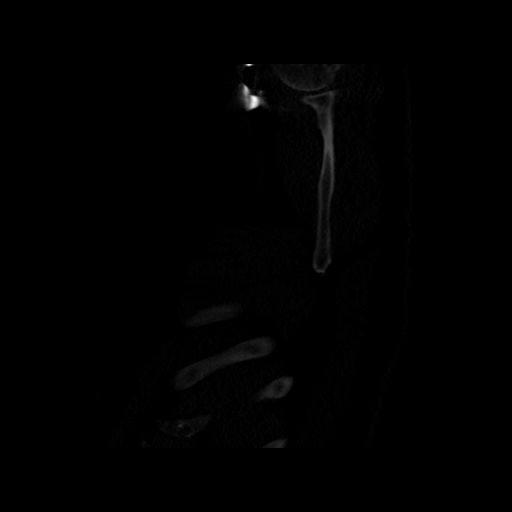

In [15]:
image_path = 'COVID-19-NY-SBU/A546520/12-30-1900-CT CHEST PULMONARY ANGIO WITH IV CON-13804/11.000000-CTA 3.000 CE-95792/1-119.dcm'
view_dicom_image(image_path)

### Extract Metadata

The following function will extract the file and patient metadata from the header of each dicom (.dcm) file within a given folder and place the collected metadata into a pandas dataframe.

In [16]:
def extract_metadata(base_folder):
  
    df = pd.DataFrame()
    file_folders = os.listdir(path = base_folder)
    
    for folder in file_folders:
            path = base_folder + '/' + folder
            meta = join_tree(path, verbose=2)
            df = pd.concat([df, meta])
        
    return df

In [17]:
base_folder =  'COVID-19-NY-SBU'
metadata = extract_metadata(base_folder)
metadata

12-31-1900-CT ABD PELVIS(WITH CHEST IMAGES) W IV CON-21869/4.000000-Lung 1.0 CE-04129/1-273.dcm: : 1it [00:00, 77.14it/s]  
01-01-1901-CT CHEST WO IV CONT-84206/6.000000-Body 3.000-02742/1-034.dcm: : 1it [00:00, 67.24it/s]  
12-19-1900-CT CHEST WO IV CONT-97223/7.000000-Body 3.000-78395/1-53.dcm: : 3it [00:00, 115.19it/s] 
12-23-1900-CT CHEST PULMONARY ANGIO WITH IV CON-62918/5.000000-CTA 15.000 CE-36514/1-008.dcm: : 2it [00:00, 90.90it/s]  
04-22-1901-CT CHEST WO IV CONT-40216/2.000000-Body 5.0-01241/1-16.dcm: : 1it [00:00, 84.04it/s]  
10-08-1900-CT ABD AND PELVIS WITH IV CONT-39755/9.000000-CTA 0.5 CE-40834/1-0163.dcm: : 1it [00:00, 83.99it/s]  
12-30-1900-CT CHEST PULMONARY ANGIO WITH IV CON-13804/11.000000-CTA 3.000 CE-95792/1-119.dcm: : 1it [00:00, 57.28it/s]  


,AccessionNumber,AcquisitionDate,AcquisitionNumber,AcquisitionTime,AcquisitionType,BitsAllocated,BitsStored,BodyPartExamined,CTDIvol,ClinicalTrialTimePointDescription,...,TotalCollimationWidth,WindowCenter,WindowWidth,XRayTubeCurrent,NoError,PathToFolder,FileName,InStackPositionNumber,StackID,TemporalPositionIndex
0,,19001231,3,173550.750,SPIRAL,16,16,CHEST,3.3,Days offset from diagnosis,...,40.0,-550.0,1600.0,143,True,12-31-1900-CT ABD PELVIS(WITH CHEST IMAGES) W ...,1-273.dcm,NaN,NaN,NaN
0,,19010101,3,013948.750,SPIRAL,16,16,CHEST,4.1,Days offset from diagnosis,...,40.0,40.0,400.0,146,True,01-01-1901-CT CHEST WO IV CONT-84206/6.000000-...,1-034.dcm,NaN,NaN,NaN
0,,19001219,3,004429.700,SPIRAL,16,16,CHEST,2.5,Days offset from diagnosis,...,40.0,-550.0,1600.0,100,True,12-19-1900-CT CHEST WO IV CONT-97223/5.000000-...,1-127.dcm,NaN,NaN,NaN
1,,19001219,3,004429.700,SPIRAL,16,16,CHEST,2.5,Days offset from diagnosis,...,40.0,40.0,400.0,119,True,12-19-1900-CT CHEST WO IV CONT-97223/8.000000-...,1-021.dcm,NaN,NaN,NaN
2,,19001219,3,004429.700,SPIRAL,16,16,CHEST,2.5,Days offset from diagnosis,...,40.0,40.0,400.0,119,True,12-19-1900-CT CHEST WO IV CONT-97223/7.000000-...,1-53.dcm,NaN,NaN,NaN
0,,19001223,5,003129.050,SPIRAL,16,16,CHEST,3.3,Days offset from diagnosis,...,40.0,70.0,500.0,102,True,12-23-1900-CT CHEST PULMONARY ANGIO WITH IV CO...,1-077.dcm,NaN,NaN,NaN
1,,19001223,5,003129.050,SPIRAL,16,16,CHEST,3.3,Days offset from diagnosis,...,40.0,70.0,500.0,102,True,12-23-1900-CT CHEST PULMONARY ANGIO WITH IV CO...,1-008.dcm,NaN,NaN,NaN
0,,19010422,3,111507.900,SPIRAL,16,16,CHEST,6.9,Days offset from diagnosis,...,40.0,40.0,400.0,260,True,04-22-1901-CT CHEST WO IV CONT-40216/2.000000-...,1-16.dcm,NaN,NaN,NaN
0,,19001008,5,150559.700,SPIRAL,16,16,CHEST,3.8,Days offset from diagnosis,...,40.0,70.0,500.0,100,True,10-08-1900-CT ABD AND PELVIS WITH IV CONT-3975...,1-0163.dcm,163.0,1_1206_00002,1.0
0,,19001230,5,013553.850,SPIRAL,16,16,ABDOMEN,6.4,Days offset from diagnosis,...,40.0,70.0,500.0,382,True,12-30-1900-CT CHEST PULMONARY ANGIO WITH IV CO...,1-119.dcm,NaN,NaN,NaN


Included in this metadata are import pieces of file and patient data, such as the body part examined, the patient's sex, the patient's age, etc. 

In [31]:
metadata.columns[40:60]

Index(['KVP', 'LongitudinalTemporalInformationModified', 'Manufacturer',
       'ManufacturerModelName', 'Modality', 'PatientAge', 'PatientBirthDate',
       'PatientComments', 'PatientID', 'PatientIdentityRemoved', 'PatientName',
       'PatientPosition', 'PatientSex', 'PerformedProcedureStepStartDate',
       'PerformedProcedureStepStartTime', 'PhotometricInterpretation',
       'PixelRepresentation', 'PixelSpacing0', 'PixelSpacing1',
       'PositionReferenceIndicator'],
      dtype='object')

In [23]:
metadata.BodyPartExamined

0      CHEST
0      CHEST
0      CHEST
1      CHEST
2      CHEST
0      CHEST
1      CHEST
0      CHEST
0      CHEST
0    ABDOMEN
Name: BodyPartExamined, dtype: object

In [18]:
metadata.PatientSex

0    F
0    M
0    M
1    M
2    M
0    M
1    M
0    F
0    F
0    M
Name: PatientSex, dtype: object

In [25]:
metadata.PatientAge

0    077Y
0    074Y
0    090Y
1    090Y
2    090Y
0    090Y
1    090Y
0    079Y
0    084Y
0    071Y
Name: PatientAge, dtype: object